In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [5]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h3>27. 02. 2025.</h3>

<h2>Basic plots and visualization</h2>

In [6]:
cube = fits.open("loc_dyn_32_32_16_150_tumag.fits")[0].data

In [7]:
np.shape(cube) #768 pixels [x], 768 pixels [y], 4 [Stokes parameters], 622 [wavelengths]

(768, 768, 4, 622)

In [8]:
I_qs = np.mean(cube[:,:,0,:])

In [9]:
print(I_qs)

310445030634039.6


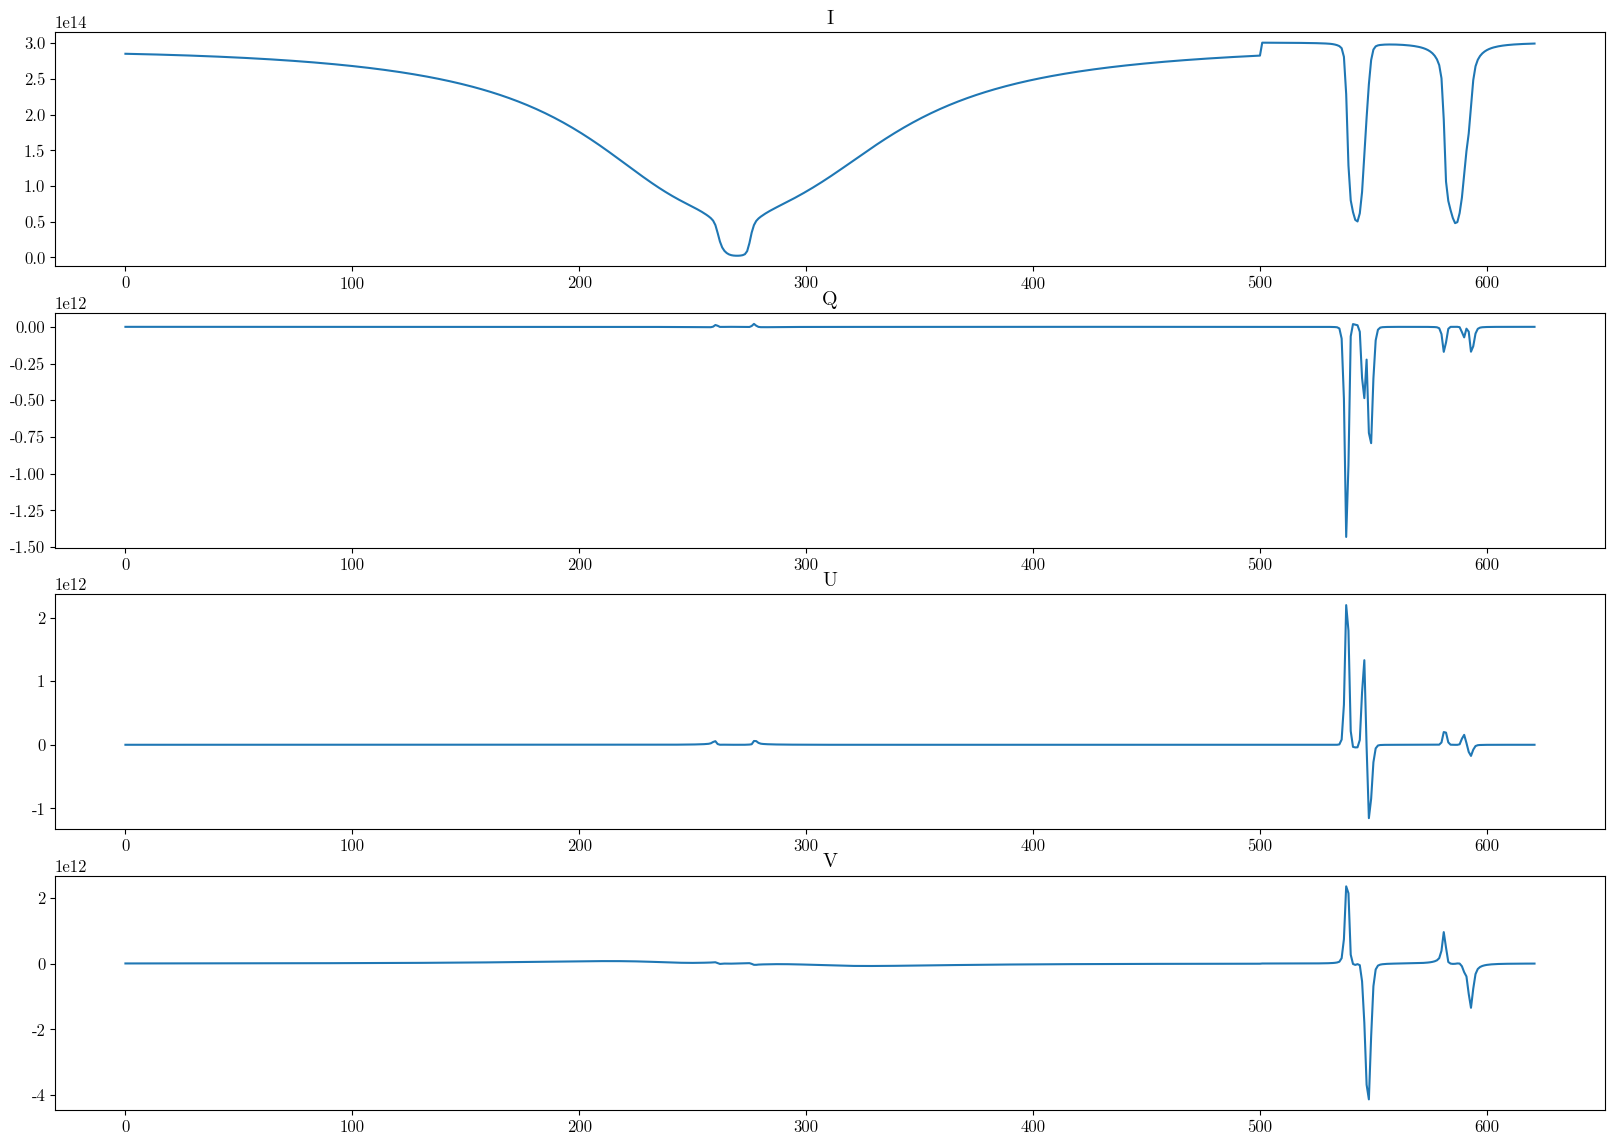

In [63]:
plt.figure(figsize=(20,14))
plt.subplot(4,1,1)
plt.plot(cube[1,1,0,:])
plt.title("I")
#plt.colorbar(label='vx [km/s]')

plt.subplot(4,1,2)
plt.plot(cube[1,1,1,:])
plt.title("Q")
#plt.colorbar(label='T [K]')

plt.subplot(4,1,3)
plt.plot(cube[1,1,2,:])
plt.title("U")
#plt.colorbar(label='Bx [G]')

plt.subplot(4,1,4)
plt.plot(cube[1,1,3,:])
plt.title("V")

plt.show()

<h3>Plotting Intensity</h3>

In [79]:
levels = [0, 261, 537]
lambdasI = []
lambdasQ = []
lambdasV = []
for level in levels:
    lambdasI.append(cube[:,:,0,level])
    lambdasQ.append(cube[:,:,1,level])
    lambdasV.append(cube[:,:,3,level])

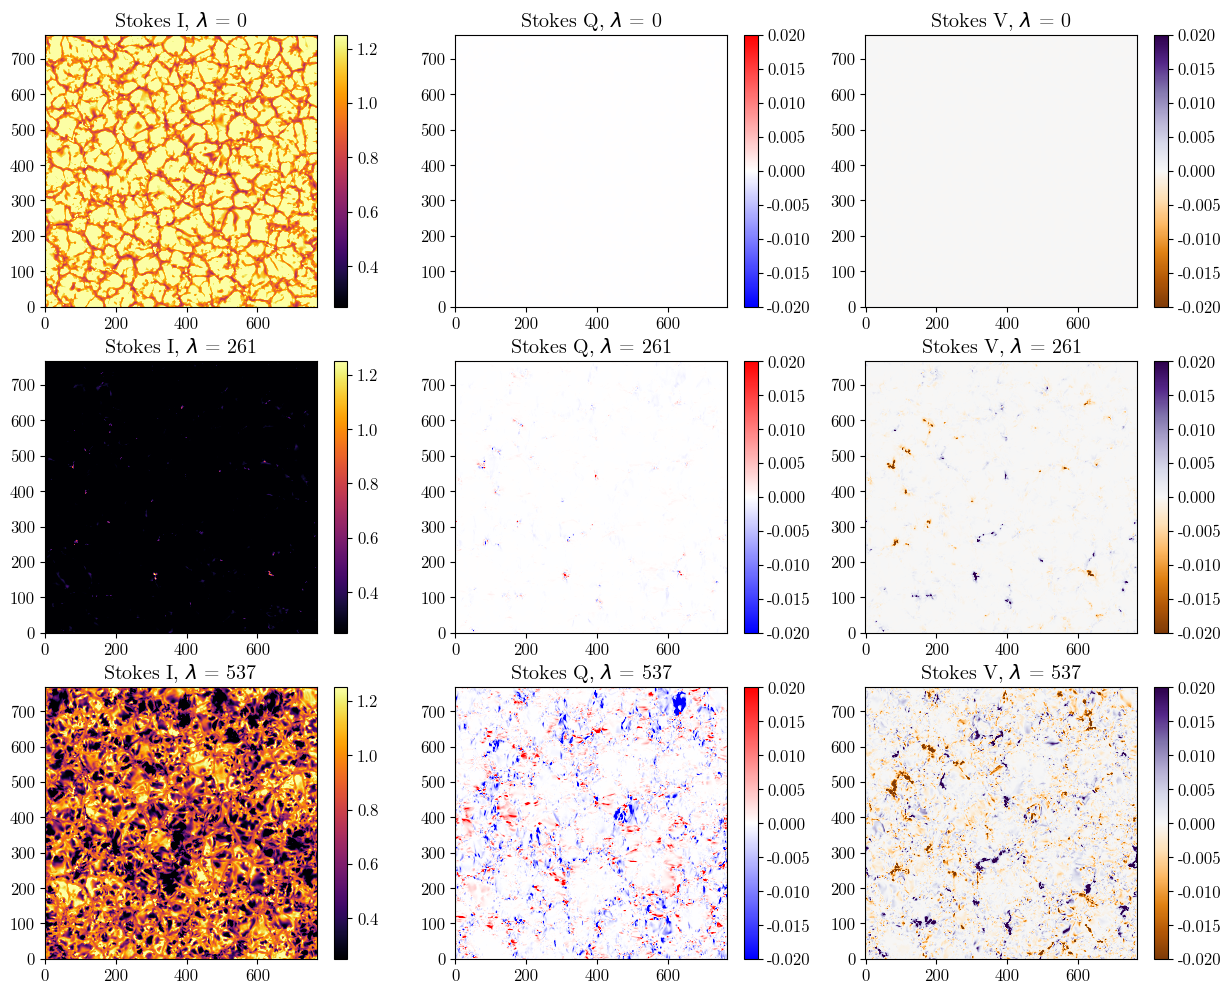

In [139]:
nlevels=len(levels)
plt.figure(figsize=(15,4*nlevels))
for i in range(0, nlevels):
    plt.subplot(nlevels,3,1+3*i)
    plt.imshow((lambdasI[i]/I_qs).T, cmap = 'inferno', origin='lower', vmin = 0.25, vmax = 1.25)
    plt.colorbar()
    plt.title(f"Stokes I, $\lambda$ = {levels[i]}")
    plt.subplot(nlevels,3,2+3*i)
    plt.imshow((lambdasQ[i]/I_qs).T, cmap = 'bwr', origin='lower', vmin = -0.02, vmax = 0.02)
    plt.title(f"Stokes Q, $\lambda$ = {levels[i]}")
    plt.colorbar()
    plt.subplot(nlevels,3,3+3*i)
    plt.imshow((lambdasV[i]/I_qs).T, cmap = 'PuOr', origin='lower', vmin = -0.02, vmax = 0.02)
    plt.title(f"Stokes V, $\lambda$ = {levels[i]}")
    plt.colorbar()
plt.show()

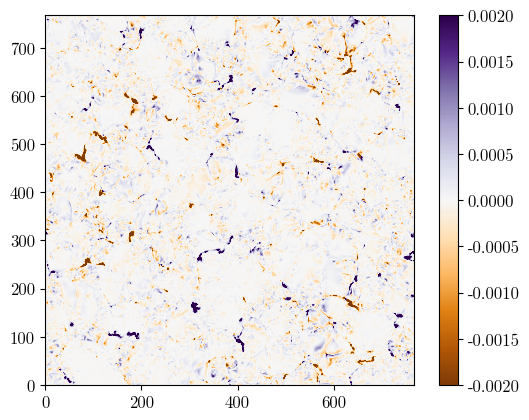

In [107]:
plt.imshow((cube[:,:,3,237]/I_qs).T, origin = "lower", cmap = "PuOr", vmin = -0.002, vmax = 0.002)
plt.colorbar()

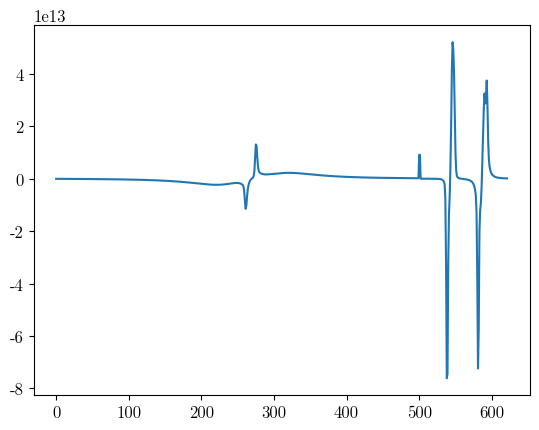

In [128]:
plt.plot(np.gradient(cube[1,1,0,])) # Stokes V is proportional to gradient of normal component of Bz